<a href="https://colab.research.google.com/github/LukichevaPolina/da_methods_labs/blob/main/K_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/23MAG_HW_1_v3.xls'
data = pd.read_excel(file_path)

# Display basic info and first few rows of the data
data_info = data.info()
data_head = data.head()

(data_info, data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   37      48 non-null     float64
 1   1       48 non-null     float64
 2   7400    48 non-null     float64
 3   9       48 non-null     float64
 4   7000    48 non-null     float64
 5   70000   48 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


(None,
    37     1        7400   9        7000      70000
 0   45.0    3.0  33100.0   12.0  34000.0  337000.0
 1    NaN    1.0  18700.0    5.0  17000.0  176000.0
 2   39.0    2.0  29100.0    9.0  29000.0  289000.0
 3   33.0    1.0  11400.0    6.0  10000.0  104000.0
 4   28.0    1.0  20100.0    NaN  18000.0  184000.0)

In [28]:
# Renaming the columns
column_names = [
    "Age", "Number_of_Dependents", "Income",
    "Residence_Length", "Car_Valuation", "Loan_Amount"
]
data.columns = column_names
data.head()

,Age,Number_of_Dependents,Income,Residence_Length,Car_Valuation,Loan_Amount
0,45.0,3.0,33100.0,12.0,34000.0,337000.0
1,NaN,1.0,18700.0,5.0,17000.0,176000.0
2,39.0,2.0,29100.0,9.0,29000.0,289000.0
3,33.0,1.0,11400.0,6.0,10000.0,104000.0
4,28.0,1.0,20100.0,NaN,18000.0,184000.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   48 non-null     float64
 1   Number_of_Dependents  48 non-null     float64
 2   Income                48 non-null     float64
 3   Residence_Length      48 non-null     float64
 4   Car_Valuation         48 non-null     float64
 5   Loan_Amount           48 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


##Данные. Выполнить первичную обработку данных. Сделать первые выводы.
1. Рассмотрите данные и вычислите основные характеристики признаков: среднее, стандартное отклонение, медиана, квартили.  Постройте гистограммы признаков и блок диаграммы  признаков. Сделайте первые выводы о возможном распределении признаков.


In [30]:
# Calculating basic statistical properties
basic_statistics = data.describe().T
basic_statistics['median'] = data.median()
basic_statistics

,count,mean,std,min,25%,50%,75%,max,median
Age,48.0,39.354167,9.068274,19.0,33.0,39.5,45.0,59.0,39.5
Number_of_Dependents,48.0,2.041667,1.030561,0.0,1.0,2.0,3.0,4.0,2.0
Income,48.0,19552.083333,9931.317103,2000.0,9875.0,19800.0,28575.0,38600.0,19800.0
Residence_Length,48.0,10.270833,4.845439,0.0,7.0,10.0,13.0,22.0,10.0
Car_Valuation,48.0,21833.333333,11180.022710,0.0,12750.0,23000.0,29250.0,50000.0,23000.0
Loan_Amount,48.0,201666.666667,99842.073878,3000.0,108250.0,196500.0,291000.0,382000.0,196500.0


**Комментарий:**

* Возраст (Age):  
Cредний возраст клиентов составляет примерно 39 лет, с медианным возрастом также равным 39,5 года. Возраст варьируется от 19 до 59 лет.

* Количество иждивенцев (Number_of_Dependents):  
Среднее значение составляет 2, с медианным значением также равным 2. Количество иждивенцев варьируется от 0 до 4.

* Доход (Income):  
Средний доход составляет примерно 19552 руб., с медианным значением 19800 руб. Доход варьируется от 2000 до 38600 руб.

* Срок проживания в регионе (Residence_Length):  
Средний срок составляет 10,3 года, с медианным значением равным 10 годам. Срок проживания варьируется от 0 до 22 лет.

* Оценка автомобиля (Car_Valuation):  
Средняя оценка составляет примерно 21833 USD, с медианным значением 23000 USD. Оценка варьируется от 0 до 50000 USD.

* Размер кредита (Loan_Amount):  
Средний размер кредита составляет примерно 201667 руб., с медианным значением 196500 руб. Размер кредита варьируется от 3000 до 382000 руб.*

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

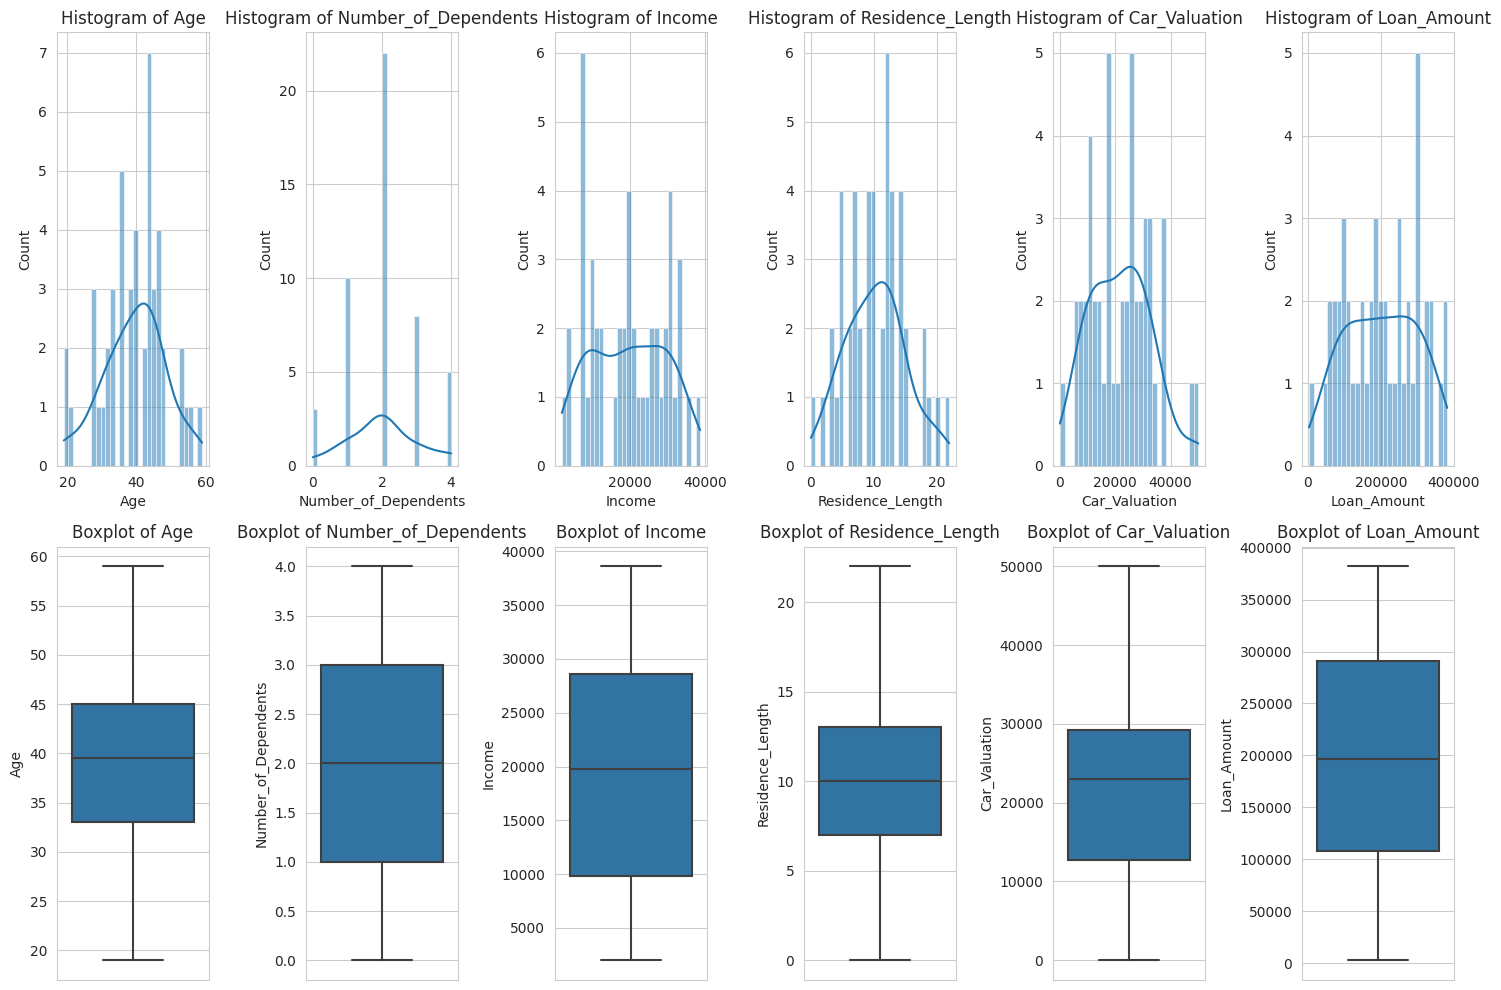

In [32]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
col_number = len(data.columns)

# Create subplots: 2 columns (histograms and boxplots)
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, col_number, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(2, col_number, i + col_number)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

**Комментарий**

* Возраст (Age):  
Распределение близко к нормальному, но с небольшим смещением вправо.

* Количество иждивенцев (Number_of_Dependents):  
 Большинство клиентов имеют 1 или 2 иждивенца. Распределение смещено влево.

* Доход (Income): Распределение имеет несколько пиков и выглядит немного смещенным влево.

* Срок проживания в регионе (Residence_Length):  
 Распределение близко к нормальному.

* Оценка автомобиля (Car_Valuation):  
 Распределение смещено влево с некоторыми высокими значениями.

* Размер кредита (Loan_Amount):  
 Распределение имеет несколько пиков и выглядит немного смещенным влево.

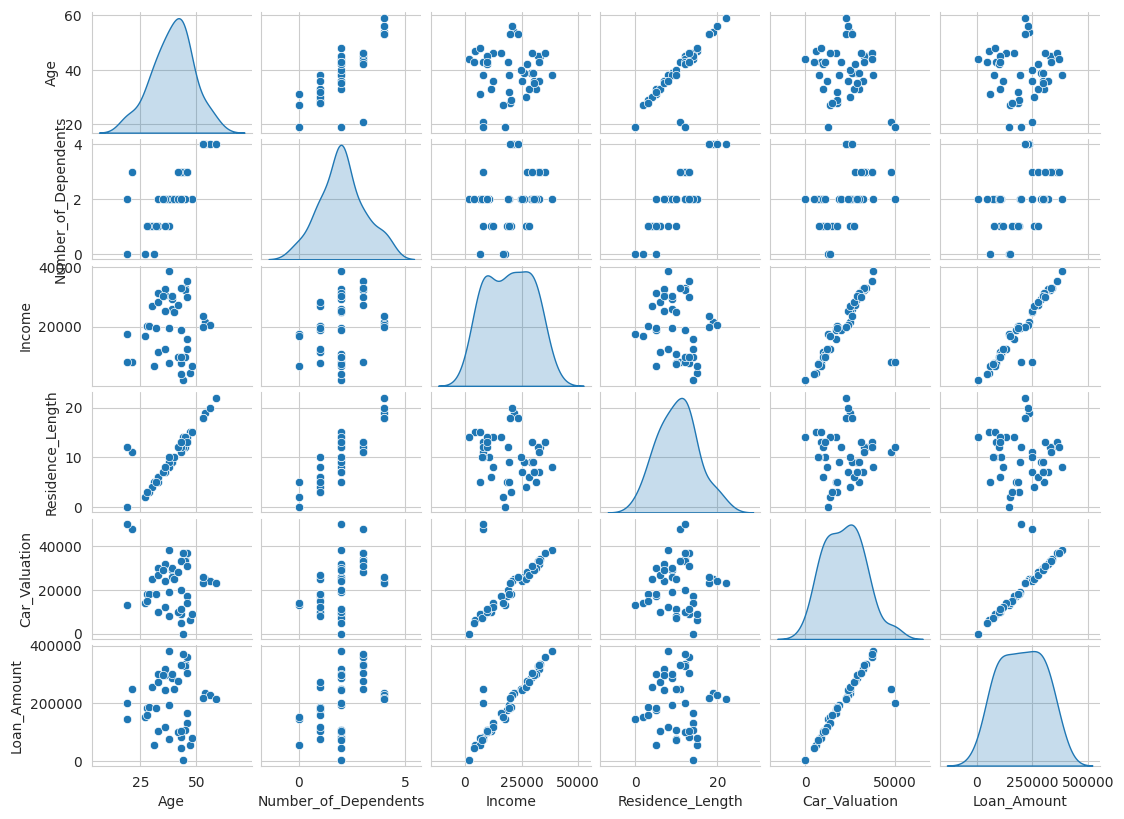

In [33]:
g = sns.pairplot(data=data, diag_kind="kde")
g.fig.set_figwidth(11)
g.fig.set_figheight(8)
pass

**Комментарий**   
Возраст и Срок проживания в регионе имеют распределения, близкие к нормальным.

Доход, Оценка автомобиля и Размер кредита имеют несколько пиков в их распределении.

Количество иждивенцев имеет дискретное распределение, что логично, так как это целочисленное значение.

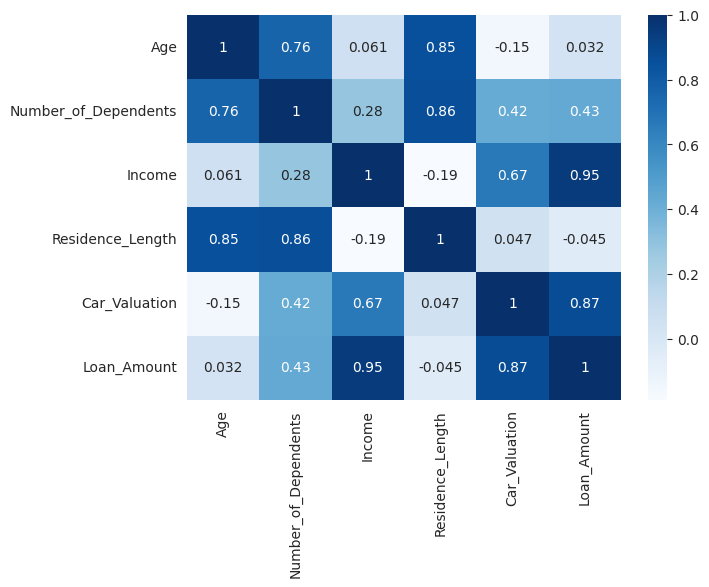

In [34]:
corr = data.corr(method='pearson')
plt.figure(figsize=(7, 5))
sns.heatmap(corr, cmap="Blues", annot=True)
pass

**Комментарий**    
Доход (Income) положительно коррелирует с Оценкой автомобиля (Car_Valuation) и Размером кредита (Loan_Amount). Это ожидаемо, так как люди с более высоким доходом, вероятно, имеют более дорогие автомобили и берут большие кредиты.

Возраст (Age) сильно коррелирует с Сроком проживания в регионе (Residence_Length). Это может указывать на то, что старшие люди, как правило, проживают в одном регионе дольше.

Некоторые другие признаки также имеют умеренные корреляции между собой.

###Распределение признаков:

* Возраст:  
 Распределение ближе к нормальному с небольшим смещением вправо, что говорит о разнообразии возрастных групп среди клиентов.

* Количество иждивенцев:  
 Большинство клиентов имеют 1 или 2 иждивенца, что может указывать на наличие семей с детьми.

* Доход:  
 Распределение смещено влево с пиком в более низком диапазоне доходов, что отражает преимущество клиентов с ниже среднего дохода.

* Срок проживания в регионе:  
 Распределение приближено к нормальному, что говорит о стабильности клиентской базы.

* Оценка автомобиля:  
 Распределение смещено влево с пиком в более высоких оценках, что указывает на то, что большинство клиентов имеют автомобили среднего или выше среднего класса.

* Размер кредита:  
 Распределение имеет несколько пиков с перекосом вправо, что отражает наличие множества небольших кредитов.
Наблюдения на основе блок-диаграмм:

---------------

Отклонения или выбросы заметны в категориях "Доход", "Срок проживания в регионе" и "Размер кредита". Эти выбросы могут указывать на наличие особых или аномальных случаев среди клиентов. (???)

---------------
Признаки "Количество иждивенцев" и "Срок проживания в регионе" имеют относительно узкий межквартильный диапазон (IQR), что указывает на то, что большинство значений этих признаков сгруппированы вокруг медианы, что говорит о стабильности этих характеристик среди клиентов.

#2. В данных есть пропуски. Подберите из литературы метод восстановления пропущенных данных и заполните пропуски по этому методу.

Пропущенные значения в данных были заполненны с помощью линейной регрессии. Похожие объекты должны иметь похожие признаки, поэтому можно предсказать недостающие значения на основе других признаков.
Для каждого признака линейная регрессия учится на запоненных данных и предсказывает пропущенные. Еще не обработанные признаки, не являющиеся целевыми на данном шаге, заполняются медианными значениями.


In [35]:
# Creating a copy of the data for median imputation
data_median_imputed = data.copy()

# Impute missing values with median
for column in data.columns:
    data_median_imputed[column].fillna(data[column].median(), inplace=True)

# Checking if there are any missing values left in the median-imputed data
missing_values_median_imputed = data_median_imputed.isnull().sum()


In [36]:
missing_values_median_imputed

Age                     0
Number_of_Dependents    0
Income                  0
Residence_Length        0
Car_Valuation           0
Loan_Amount             0
dtype: int64

In [37]:
from sklearn.linear_model import LinearRegression

# Clear warnings about changing
# "A value is trying to be set on a copy of a slice from a DataFrame."
pd.options.mode.chained_assignment = None

# Creating a copy of the data for linear regression imputation
data_linreg_imputed = data.copy()

# Function to impute missing values using linear regression
def linear_regression_impute(data, target_col, median_imputed_data):
    # Creating datasets: one with missing values and one without
    missing_data = data[data[target_col].isnull()]
    non_missing_data = data.dropna(subset=[target_col])

    # Defining predictors and target
    predictors = non_missing_data.drop(columns=[target_col])
    target = non_missing_data[target_col]

    # Handling missing values in predictors using median imputed data
    predictors.fillna(median_imputed_data, inplace=True)
    missing_data.fillna(median_imputed_data, inplace=True)

    # Fitting the linear regression model
    model = LinearRegression()
    model.fit(predictors, target)

    # Predicting and imputing the missing values
    predicted_values = model.predict(missing_data.drop(columns=[target_col]))
    data.loc[data[target_col].isnull(), target_col] = predicted_values

    return data

# Applying the function to each column with missing values
for column in data.columns:
    if data[column].isnull().sum() > 0:  # Check if there are missing values
        data_linreg_imputed = linear_regression_impute(data_linreg_imputed, column, data_median_imputed)

data_linreg_imputed.head()

,Age,Number_of_Dependents,Income,Residence_Length,Car_Valuation,Loan_Amount
0,45.000000,3.0,33100.0,12.000000,34000.0,337000.0
1,31.517625,1.0,18700.0,5.000000,17000.0,176000.0
2,39.000000,2.0,29100.0,9.000000,29000.0,289000.0
3,33.000000,1.0,11400.0,6.000000,10000.0,104000.0
4,28.000000,1.0,20100.0,3.504593,18000.0,184000.0


In [38]:
# Checking if there are any missing values left in the linear regression imputed data
missing_values_linreg_imputed = data_linreg_imputed.isnull().sum()
missing_values_linreg_imputed

Age                     0
Number_of_Dependents    0
Income                  0
Residence_Length        0
Car_Valuation           0
Loan_Amount             0
dtype: int64

#3. В данных возможны выбросы. Подберите из литературы метод определения выбросов и удалите объекты, идентифицированные как выбросы по этому методу.


Боксплоты способны отображать выбросы. Согласно документации, границы выбросов определяются следующим образом:
IQR = Q3 - Q1  
Q1 - 1.5 * IQR  
Q3 + 1.5 * IQR

По построенным в пункте 1 графикам можно сделать вывод о том, что ни один из признаков выбросов не имеет.  

Однако, графики построены до заполнения пропущенных значений. Попробуем обнаружить выбросы на подготовленных данных.

###a. IQR - Межквартильный размах  
Первым используем тот же способ, который применяется в боксплотах.

In [39]:
# Identifying outliers using IQR Method
outliers_iqr = []

# Calculate IQR and identify outliers for each column
for column in data_linreg_imputed.columns:
    Q1 = data_linreg_imputed[column].quantile(0.25)
    Q3 = data_linreg_imputed[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining outliers
    outliers_condition = (data_linreg_imputed[column] < (Q1 - 1.5 * IQR)) | (data_linreg_imputed[column] > (Q3 + 1.5 * IQR))
    outliers = data_linreg_imputed[outliers_condition].index.tolist()

    # Appending identified outliers to the list
    outliers_iqr.extend(outliers)

# Removing duplicate indexes
outliers_iqr = list(set(outliers_iqr))

# Displaying the outlier data points
outliers_data_iqr = data_linreg_imputed.loc[outliers_iqr].sort_index()

print("Outliers num:", len(outliers_iqr))
outliers_data_iqr


Outliers num: 0


,Age,Number_of_Dependents,Income,Residence_Length,Car_Valuation,Loan_Amount


В данных, пропуски в которых были заполнены с помощью линейной регересии, данный подход не выявил выбросов. Это значит, что никакие признаки не раположены за пределами 1.5 межквартильных размахов за первым и третьим квартилями.


###б. Z-score
Z-score (или стандартизованное значение) — это мера, которая показывает, на сколько стандартных отклонений наблюдаемое значение отклоняется от среднего значения выборки. Он вычисляется по формуле:

Z=(X-μ)/σ где:

X — наблюдаемое значение,

μ — среднее значение выборки,

σ — стандартное отклонение выборки.


Z-score часто используется для определения того, насколько необычным является конкретное значение в контексте выборки данных. Например, если Z-score равно 3 или -3, это указывает на то, что значение находится на расстоянии трех стандартных отклонений от среднего значения выборки.



In [40]:
from scipy.stats import zscore
import numpy as np

# Calculating Z-scores
z_scores = np.abs(zscore(data_linreg_imputed))

# Identifying outliers
z_threshold = 3  # Commonly used Z-score threshold for identifying outliers
outliers_z_score = np.where(z_scores > z_threshold)

# Displaying the outlier data points
outliers_data_z_score = data_linreg_imputed.iloc[outliers_z_score[0]].copy()
outliers_data_z_score['OutlierFeature'] = data.columns[outliers_z_score[1]]
outliers_data_z_score.sort_index(inplace=True)

print("Outliers num:", len(np.unique(outliers_z_score[0])))
outliers_data_z_score

Outliers num: 0


,Age,Number_of_Dependents,Income,Residence_Length,Car_Valuation,Loan_Amount,OutlierFeature


Используя метод Z-Score с пороговым значением 3, не было выявлено никаких отклонений.


###в. DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, который группирует вместе точки, находящиеся плотно друг к другу, и отмечает точки, находящиеся далеко от любой группы, как выбросы. Он основан на плотностном представлении данных.

Основные параметры DBSCAN:

* eps: Максимальное расстояние между двумя объектами данных, при котором они считаются соседями.

* min_samples: Минимальное количество точек, которые должны находиться в пределах eps-радиуса, чтобы рассматривать регион как плотный.

*Как подбирать параметры:*

* eps: Если значение eps слишком маленькое, большинство данных не будет кластеризовано и будет считаться выбросами. Если eps слишком велико, то разные кластеры могут быть объединены в один. Чтобы выбрать подходящее значение eps, можно использовать метод "k-distance", где для каждой точки строится график расстояний до k-го ближайшего соседа. "Локоть" на таком графике может указать на оптимальное значение eps.

* min_samples: Этот параметр определяет, сколько точек должно находиться в eps-радиусе, чтобы регион считался плотным. Он влияет на то, сколько выбросов будет идентифицировано. Обычно выбирается на основе знания доменной области или экспериментально.

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_linreg_imputed)

# Applying DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

# Identifying outliers: data points assigned to cluster -1 are considered outliers
outliers_dbscan = np.where(clusters == -1)

# Displaying the outlier data points
outliers_data_dbscan = data_linreg_imputed.iloc[outliers_dbscan].sort_index()

# Number of outliers detected by DBSCAN
num_outliers_dbscan = len(outliers_data_dbscan)

(outliers_data_dbscan, num_outliers_dbscan)


(     Age  Number_of_Dependents   Income  Residence_Length  Car_Valuation  \
 3   33.0                   1.0  11400.0               6.0   10000.000000   
 10  38.0                   2.0  38600.0               8.0   38000.000000   
 13  21.0                   3.0   8200.0              11.0   48000.000000   
 15  38.0                   2.0  19600.0               9.0   19000.000000   
 20  19.0                   0.0  17600.0               0.0   13000.000000   
 22  31.0                   0.0   6900.0               5.0    3409.115058   
 25  43.0                   2.0  18900.0              12.0   20000.000000   
 28  27.0                   0.0  16900.0               2.0   14000.000000   
 29  30.0                   1.0  27000.0               4.0   25000.000000   
 34  33.0                   1.0  28400.0               6.0   27000.000000   
 35  38.0                   1.0   7900.0              10.0    8000.000000   
 40  19.0                   2.0   8000.0              12.0   50000.000000   

Метод DBSCAN идентифицировал 13 точек данных как выбросы в данных при eps = 1, min_samples = 5.  
Проведем эксперимент по подбору оптимальных параметров для кластеризации.

In [42]:
# Creating a DataFrame to store the results of the experiments
experiment_results = []

# Trying different values for eps and min_samples
eps_values = [0.5, 1, 1.5, 2, 2.5, 3]
min_samples_values = [3, 5, 7, 10, 12]

# Performing experiments
for eps in eps_values:
    for min_samples in min_samples_values:
        # Applying DBSCAN with the current parameter values
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_scaled)

        # Identifying outliers and counting them
        num_outliers = np.sum(clusters == -1)

        # Storing the results
        experiment_results.append((eps, min_samples, num_outliers))

# Converting the results to a DataFrame
experiment_results_df = pd.DataFrame(experiment_results, columns=['eps', 'min_samples', 'num_outliers'])

experiment_results_df


,eps,min_samples,num_outliers
0,0.5,3,35
1,0.5,5,51
2,0.5,7,51
3,0.5,10,51
4,0.5,12,51
5,1.0,3,8
6,1.0,5,13
7,1.0,7,24
8,1.0,10,51
9,1.0,12,51


In [82]:
# Applying DBSCAN with chosen parameters
dbscan = DBSCAN(eps=2.5, min_samples=7)
clusters = dbscan.fit_predict(data_scaled)

# Identifying outliers
outliers_dbscan = np.where(clusters == -1)

# Displaying the outlier data points
outliers_data_dbscan = data_linreg_imputed.iloc[outliers_dbscan].sort_index()

# Creating a dataset without the identified outliers
data_no_outliers = data_linreg_imputed.drop(index=outliers_data_dbscan.index)

# Summary: Number of outliers and shape of the data without outliers
print("Number of outliers:", np.sum(clusters == -1))
print("Shape of the data without outliers", data_no_outliers.shape)
print("Outliers:")
outliers_data_dbscan

Number of outliers: 2
Shape of the data without outliers (49, 6)
Outliers:


,Age,Number_of_Dependents,Income,Residence_Length,Car_Valuation,Loan_Amount
13,21.0,3.0,8200.0,11.0,48000.0,250000.0
40,19.0,2.0,8000.0,12.0,50000.0,200000.0


**Выводы**:
* Строка 13: Клиенту 21 год, у него 3 иждивенца, доход 8200 руб., он проживает в регионе 11 лет, оценка его автомобиля составляет 48000 USD, и он взял кредит на 250000 руб.

* Строка 40: Клиенту 19 лет, у него 2 иждивенца, доход 8000 руб., он проживает в регионе 12 лет, оценка его автомобиля составляет 50000 USD, и он взял кредит на 200000 руб.

На первый взгляд оба клиента молоды, имеют средний или ниже среднего доход, но при этом взяли довольно большие кредиты. Достаточно не обычно, что у одного клиента 3 иждевенца в 21 год, и 2 в 19. Также, возможно, такие большие кредиты для клиентов с таким доходом и возрастом являются необычными в контексте всего датасета, и поэтому DBSCAN определил их как выбросы.


# Снижение размерности. Метод PCA (Principal Component Analysis=метод главных компонент).


##4. Выполнить центрирование данных и такую нормировку, что евклидова норма каждого признака равна 1 (полученная матрица обозначается через Z).


Центрирование данных — это процесс вычитания среднего значения каждого признака из каждого значения этого признака. Это делает среднее значение каждого признака равным нулю.

Нормировка данных так, чтобы евклидова норма каждого признака была равна 1, означает деление каждого значения признака на евклидову норму этого признака.

Евклидова норма для вектора v определяется как:
- Вычесть среднее значение каждого признака из каждого значения этого признака (центрирование).
- Разделить каждое значение признака на евклидову норму этого признака.

In [44]:
from sklearn.preprocessing import StandardScaler

# Initializing a standard scaler
scaler = StandardScaler()

# Fitting the scaler and transforming the data
data_z = scaler.fit_transform(data_no_outliers)

# Converting to DataFrame for better visualization and handling
data_z_df = pd.DataFrame(data_z, columns=data_no_outliers.columns, index=data_no_outliers.index)

# Look at normalized data
data_z_df.head()


,Age,Number_of_Dependents,Income,Residence_Length,Car_Valuation,Loan_Amount
0,0.621801,0.944196,1.312581,0.377910,1.387528,1.368081
1,-1.058416,-1.043390,-0.166506,-1.064397,-0.333188,-0.272257
2,-0.125938,-0.049597,0.901724,-0.240221,0.881435,0.879036
3,-0.873677,-1.043390,-0.916321,-0.858353,-1.041718,-1.005824
4,-1.496793,-1.043390,-0.022706,-1.372517,-0.231970,-0.190750


In [45]:
# Checking the mean and standard deviation of the standardized data
mean_std_data_z = pd.DataFrame({
    'Mean': data_z_df.mean(),
    'StdDev': data_z_df.std()
})

mean_std_data_z

,Mean,StdDev
Age,3.715848e-16,1.010363
Number_of_Dependents,1.025257e-16,1.010363
Income,3.625218e-17,1.010363
Residence_Length,-1.812609e-16,1.010363
Car_Valuation,4.531523e-18,1.010363
Loan_Amount,-3.308011e-16,1.010363


Как и ожидалось, средние значения очень близки к нулю, а стандартные отклонения близки к 1, что указывает на успешность нашей стандартизации.

##5. Найти SVD разложение матрицы Z (матрицы U, S, V).

Сингулярное разложение (SVD) — это метод факторизации матрицы, который представляет её как произведение трёх других матриц:
U, S, и V^T. В машинном обучении применяется для сжатия данных и методов машинного обучения.

* U — это левая сингулярная матрица. Её столбцы представляют собой "левые" сингулярные векторы матрицы данных. В контексте данного задания, столбцы матрицы U представляют собой направления максимальной дисперсии в пространстве объектов.

* S — это диагональная матрица сингулярных значений. Эти значения представляют собой корни из собственных значений матрицы Z^T Z. Они отсортированы по убыванию и показывают "важность" каждого соответствующего сингулярного вектора.

* V^T — это правая сингулярная матрица. Её строки представляют собой "правые" сингулярные векторы матрицы данных. В контексте данного задания, строки матрицы
V^T представляют собой направления максимальной дисперсии в пространстве признаков.

In [46]:
import numpy as np

# Calculating the SVD of data_z
U, S, VT = np.linalg.svd(data_z, full_matrices=False)

# Creating DataFrames for better visualization
U_df = pd.DataFrame(U, columns=[f"U{i}" for i in range(1, U.shape[1] + 1)], index=data_no_outliers.index)
S_df = pd.DataFrame(np.diag(S), index=[f"S{i}" for i in range(1, len(S) + 1)], columns=[f"S{i}" for i in range(1, len(S) + 1)])
VT_df = pd.DataFrame(VT, columns=[f"VT{i}" for i in range(1, VT.shape[1] + 1)], index=[i for i in range(1, VT.shape[0] + 1)])

# Displaying the components of the SVD
U_df.head()

,U1,U2,U3,U4,U5,U6
0,-0.201531,-0.045111,0.015219,0.134137,-0.047837,0.036216
1,0.112227,-0.108189,-0.010663,0.046585,0.016579,0.031389
2,-0.085436,-0.097513,0.115422,0.020322,0.018028,0.084769
3,0.181760,-0.025061,-0.062118,0.127480,0.024110,0.106822
4,0.117896,-0.152350,-0.167260,-0.143189,0.104947,0.190701


In [47]:
 S_df

,S1,S2,S3,S4,S5,S6
S1,12.822131,0.000000,0.000000,0.000000,0.00000,0.00000
S2,0.000000,11.256532,0.000000,0.000000,0.00000,0.00000
S3,0.000000,0.000000,1.588221,0.000000,0.00000,0.00000
S4,0.000000,0.000000,0.000000,0.510657,0.00000,0.00000
S5,0.000000,0.000000,0.000000,0.000000,0.29314,0.00000
S6,0.000000,0.000000,0.000000,0.000000,0.00000,0.11964


In [48]:
 VT_df.head()

,VT1,VT2,VT3,VT4,VT5,VT6
1,-0.316694,-0.441065,-0.432207,-0.267793,-0.481130,-0.463859
2,0.502557,0.347371,-0.379276,0.538586,-0.292597,-0.327462
3,0.390394,-0.827406,0.070390,0.357719,0.138189,0.104773
4,0.685520,0.012454,-0.145909,-0.710831,0.009065,0.057052
5,-0.135940,0.001844,-0.687815,0.017802,0.712604,-0.017477


##6. Исследуйте, сколько скрытых факторов (главные факторы) достаточно для хорошей аппроксимации матрицы данных Z. Замените значения исходных признаков линейными комбинациями главных факторов (матрица Zk, k – число главных факторов). Вычислите погрешность аппроксимации в спектральной матричной  норме и норме Фробениуса.


1. Explained_variance:
Переменная explained_variance представляет собой "объясненную дисперсию" каждого из сингулярных значений. При выполнении сингулярного разложения матрицы (SVD), сингулярные значения (элементы матрицы S) представляют собой "важность" каждого из сингулярных векторов. Таким образом, квадраты этих сингулярных значений (при делении на сумму всех квадратов сингулярных значений) дают долю дисперсии, которую объясняет каждый из компонентов.

2. Число главных факторов для хорошей аппроксимации:
Для определения количества главных факторов (или компонентов), которые следует включить, обычно используют кумулятивную объясненную дисперсию. Это показывает, какую долю общей дисперсии объясняют первые k компонентов. В нашем случае первые два компонента объясняют приблизительно 99% дисперсии, что является очень высоким показателем.

3. Погрешности аппроксимации:
Погрешность в спектральной матричной норме отражает максимальное сингулярное значение разности исходной матрицы и её аппроксимации. Погрешность в норме Фробениуса отражает "среднеквадратичное" отклонение между исходной матрицей и её аппроксимацией.

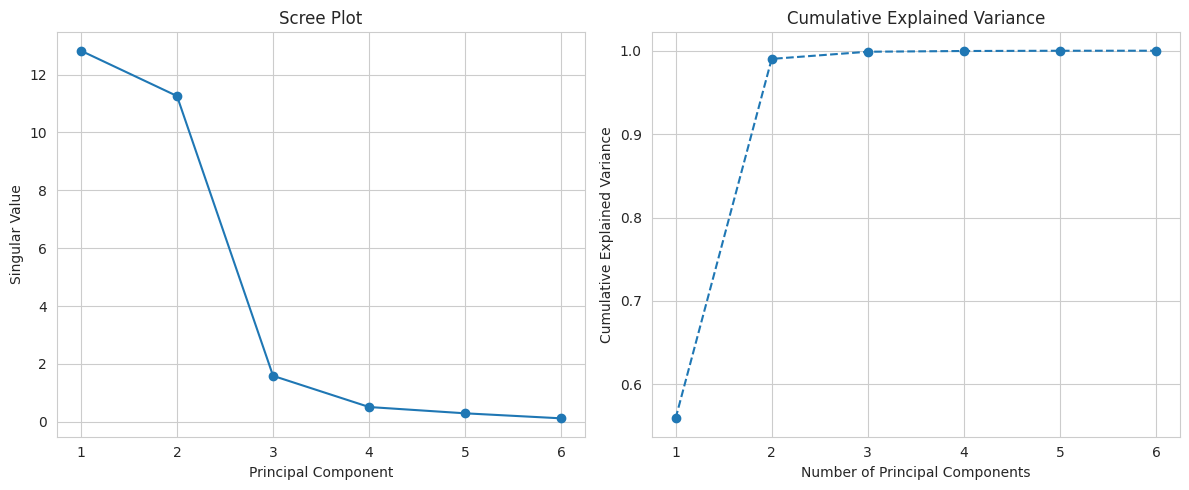

(array([5.59207600e-01, 4.30984711e-01, 8.57974511e-03, 8.86975018e-04,
        2.92282217e-04, 4.86862842e-05]),
 array([0.5592076 , 0.99019231, 0.99877206, 0.99965903, 0.99995131,
        1.        ]))

In [49]:
import matplotlib.pyplot as plt

# Calculating the explained variance for each singular value
explained_variance = S ** 2 / np.sum(S ** 2)

# Calculating the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Creating a scree plot and cumulative explained variance plot
plt.figure(figsize=(12, 5))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(S) + 1), S, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular Value')

# Cumulative explained variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(S) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

(explained_variance, cumulative_explained_variance)


* График осыпи: отображает сингулярные значения, аналогичные собственным значениям матрицы ковариации исходных данных. Эти значения показывают "важность" или "мощность" каждого из главных компонент. В наших данных первые два компонента имеют значительно большие сингулярные значения по сравнению с остальными, что подчеркивает их значимость.

* Совокупная объясненная дисперсия: Этот показатель отражает долю общей дисперсии, объясненной первыми k главными компонентами. В нашем случае первый компонент объясняет 55.92% общей дисперсии, первые два компонента объясняют 99.02% общей дисперсии, первые три компонента объясняют 99.88% общей дисперсии. И так далее...

Учитывая совокупную объясненную дисперсию, мы могли бы решить использовать первые два главных компонента, так как они объясняют значительную часть (почти 99.02%) общей дисперсии в данных.

Чтобы заменить значения исходных признаков линейными комбинациями главных факторов, нам нужно умножить матрицу U (сокращенную до k столбцов) на диагональную матрицу S (сокращенную до k x k).

Погрешность аппроксимации можно рассчитать, сравнив разницу между исходной матрицей Z и аппроксимированной матрицей Zk в спектральной матричной норме и норме Фробениуса.

In [83]:
# Selecting the number of principal components to retain
k = 2

# Constructing Zk
Uk = U[:, :k]
Sk = np.diag(S[:k])
VTk = VT[:k, :]

# Calculating Zk
Zk = np.dot(Uk, np.dot(Sk, VTk))

# Calculating the approximation error in the spectral norm and Frobenius norm
error_spectral_norm = np.linalg.norm(data_z - Zk, ord=2)
error_frobenius_norm = np.linalg.norm(data_z - Zk, ord='fro')

print("Approximation error in the Spectral norm:", error_spectral_norm, "%")
print("Approximation error in the Frobenius norm:", error_frobenius_norm, "%")

# Displaying Zk Zk[:5, :]

Approximation error in the Spectral norm: 1.588220722554276 %
Approximation error in the Frobenius norm: 1.6980755160444496 %


Погрешность в спектральной матричной норме:
1.5882%

Погрешность в норме Фробениуса:
1.6981%

### Интерпретация:

Погрешность в спектральной матричной норме отражает максимальное сингулярное значение разности между исходной матрицей и её аппроксимацией. Это показатель наибольшего "растяжения" или "сжатия", которое производится аппроксимацией по сравнению с исходными данными.

Погрешность в норме Фробениуса представляет собой "среднеквадратичное" отклонение между исходной матрицей и её аппроксимацией. Это показатель распределения ошибки по всем элементам матрицы.

Эти значения погрешности подтверждают, что аппроксимация с использованием первых двух главных компонент дает достаточно точное представление о исходных данных, хотя и с некоторой потерей информации

Учитывая, что PCA - это метод уменьшения размерности с потерями, некоторая ошибка ожидаема и нормальна. Главное - найти баланс, при котором мы сохраняем в данных как можно больше важной информации, но при этом уменьшаем размерность.

##7. Используя выделенные главные факторы, найти представления клиентов векторами меньшей размерности (размерности k) и построить карту клиентов. Сделать выводы о клиентах банка.


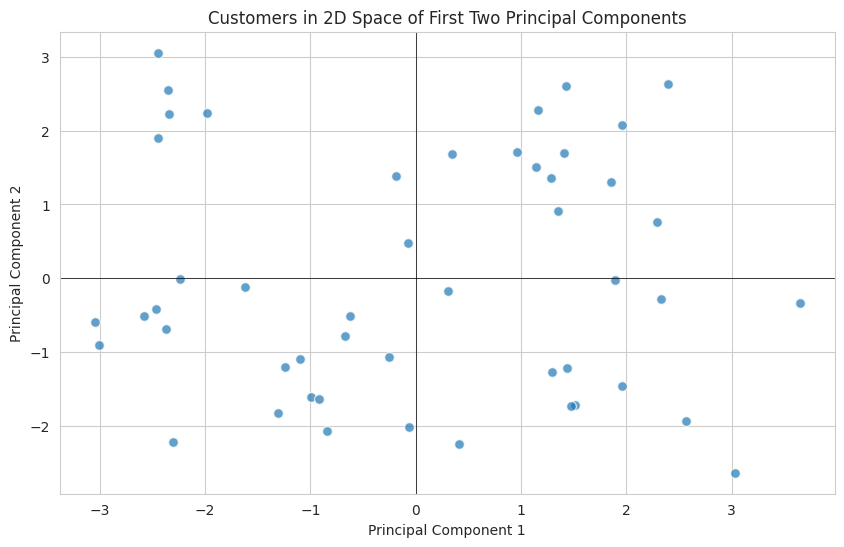

,PC1,PC2
0,-2.584058,-0.507798
1,1.438995,-1.217831
2,-1.095475,-1.097658
3,2.330555,-0.282101
4,1.511680,-1.714937


In [51]:
# Calculating the matrix T (customers in lower-dimensional space)
T = np.dot(Uk, Sk)

# Converting to DataFrame for better visualization and handling
T_df = pd.DataFrame(T, columns=[f"PC{i}" for i in range(1, k + 1)], index=data_no_outliers.index)

# Creating a scatter plot of the customers in the 2D space formed by the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(T_df['PC1'], T_df['PC2'], alpha=0.7, edgecolors='w', s=50)
plt.title('Customers in 2D Space of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

T_df.head()


На основе представления клиентов в двумерном пространстве первых двух главных компонентов мы можем сделать следующие наблюдения:

* Распределение клиентов:  
Клиенты разбросаны в разных частях графика, что указывает на различные характеристики или атрибуты клиентов, которые влияют на их позиционирование.

* Квадранты:  
Клиенты распределены по четырем квадрантам. Это может указывать на различные сегменты или группы клиентов, каждая из которых имеет свои уникальные особенности или характеристики.

* Основной компонент 1 (PC1):  
Как видно из графика, клиенты значительно различаются по этому измерению. Это может указывать на определенные ключевые характеристики или атрибуты, которые отличают одних клиентов от других.

* Основной компонент 2 (PC2):  
Это измерение также показывает некоторую вариабельность среди клиентов, хотя, возможно, оно менее выражено, чем PC1.

На основе этого графика можно сказать, что существует разнообразие клиентов с различными характеристиками.

##Снижение размерности. Интерпретация скрытых факторов.



###8. Выписать матрицу коэффициентов разложения признаков zj по главным факторам. Исследовать структуру этой матрицы с целью выделения групп признаков тесно связанных с каждым из главных факторов.

In [52]:
# Extracting the loadings for the first two principal components from VT
loadings = VTk.T

# Creating a DataFrame for better visualization and interpretation
loadings_df = pd.DataFrame(loadings, index=data_no_outliers.columns, columns=[f"PC{i}" for i in range(1, k + 1)])

# Displaying the loadings
loadings_df


,PC1,PC2
Age,-0.316694,0.502557
Number_of_Dependents,-0.441065,0.347371
Income,-0.432207,-0.379276
Residence_Length,-0.267793,0.538586
Car_Valuation,-0.481130,-0.292597
Loan_Amount,-0.463859,-0.327462


На основе этих данных можно сделать следующие выводы:

* PC1 (Первый главный компонент):  
Отрицательно коррелирует с большинством признаков, что указывает на обратное влияние этих признаков на PC1. Чем выше у клиентов эти показатели (например, оценка автомобиля, доход, размер кредита), тем ниже будет их значение на PC1.
"Оценка автомобиля" имеет наибольший вес, что указывает на то, что клиенты с высокооцененными автомобилями имеют низкие значения на PC1.

* PC2 (Второй главный компонент):  
"Срок проживания в регионе" и "Возраст" положительно коррелируют с PC2, указывая на то, что клиенты, которые дольше проживают в регионе или старше по возрасту, имеют высокие значения на PC2.
"Доход" и "Размер кредита" отрицательно коррелируют с PC2, что указывает на то, что клиенты с более высокими доходами или более крупными кредитами имеют более низкие значения на PC2.

####Выводы о клиентах банка:

Первый главный компонент (PC1) может интерпретироваться как показатель "финансового благосостояния" клиента. Клиенты с высокими значениями признаков, таких как оценка автомобиля, доход и размер кредита, имеют низкие значения на PC1. Это может указывать на то, что более состоятельные клиенты или клиенты с более дорогими автомобилями взяли больше кредитов.

Второй главный компонент (PC2), вероятно, отражает "долгосрочность" отношений клиента с банком или регионом. Клиенты, которые дольше проживают в регионе или старше по возрасту, но при этом имеют более низкий доход или меньший кредит, имеют высокие значения на PC2.

####Эти выводы предоставляют ценную информацию для банка о характеристиках и поведении его клиентов. Таким образом, банк может использовать эту информацию для разработки продуктов или маркетинговых кампаний, нацеленных на разные сегменты клиентов.

In [53]:
# Taking absolute values of the loadings to see the magnitude of influence regardless of the direction
absolute_loadings = loadings_df.abs()

# Finding the most influential features for each principal component
top_features_per_pc = absolute_loadings.idxmax()

top_features_per_pc

PC1       Car_Valuation
PC2    Residence_Length
dtype: object

На основе абсолютных значений загрузок, наиболее влиятельные признаки для каждого из главных факторов следующие:

* PC1 (Первый главный компонент):  
Наибольшее влияние оказывает признак "Оценка автомобиля" (Car_Valuation).

* PC2 (Второй главный компонент):  
Наибольшее влияние оказывает признак "Срок проживания в регионе" (Residence_Length).

Это соответствует нашим ранее сделанным выводам. Первый главный компонент может быть интерпретирован как показатель "финансового благосостояния" клиента, в то время как второй главный компонент может быть интерпретирован как показатель "стабильности или зрелости" клиента.

###9. На основе анализа структуры матрицы коэффициентов разложения, предложить интерпретацию выделенным главным факторам. Дать интерпретацию построенной выше карте клиентов.


На основе матрицы коэффициентов разложения и наших предыдущих анализов, интерпретацию выделенных главных факторов можно сформулировать следующим образом:

1. PC1 (Финансовое положение):
Этот главный компонент охватывает аспекты финансового положения клиентов. Переменные, такие как доход, стоимость автомобиля и сумма кредита, играют ключевую роль в этом компоненте. Это подчеркивается сильными загрузками этих переменных в PC1. Клиенты с высоким значением по этому компоненту, скорее всего, имеют более низкий доход, меньший кредит и более низкую оценку автомобиля.

2. PC2 (Стабильность/зрелость):
Второй главный компонент, похоже, концентрируется на аспектах стабильности и возможно зрелости клиентов. Это подтверждается включением таких переменных, как продолжительность проживания, возраст и количество зависимых. Клиенты с высоким значением в этом компоненте, вероятно, проживали в одном регионе долгое время, старше и имеют больше иждивенцев.
Интерпретация карты клиентов:

-----------

Квадрант I: Клиенты в этой зоне, вероятно, более финансово скромные, но одновременно демонстрируют признаки стабильности и зрелости. Они могут иметь меньший доход и меньшие кредиты, но долгое время проживают в одном месте, возможно старше и имеют больше иждивенцев.

Квадрант II: Клиенты в этой области могут испытывать финансовые трудности, но при этом демонстрируют стабильность или зрелость. Они могут иметь низкий доход и большие кредиты, но проживают в одном месте долгое время, возможно старше и имеют больше иждивенцев.

Квадрант III: Клиенты в этой зоне могут испытывать финансовые трудности и, возможно, менее стабильны. Они могут иметь низкий доход, большие кредиты и проживать в своем текущем месте жительства недолго.

Квадрант IV: Клиенты здесь, скорее всего, имеют лучшее финансовое положение, но могут быть новичками в своем регионе или моложе по возрасту.

-----------

####Последствия для бизнеса:

Такой анализ может быть полезен для банков и финансовых учреждений при разработке продуктов, стратегий таргетинга и принятия решений о предоставлении кредитов. Например, клиенты из Квадранта I могут быть идеальными кандидатами для долгосрочных кредитных продуктов или ипотеки, в то время как клиенты из Квадранта III могут требовать дополнительной оценки рисков.

## Снижение размерности. Метод MDS (Multidimensional Scaling = многомерное шкалирование)



###10. Предложите способ вычисления расстояния между клиентами и вычислите матрицу расстояний.

Способ вычисления расстояния между клиентами

Выбор метрики для вычисления расстояний между клиентами зависит от природы данных и того, какие аспекты сходства или различия между клиентами мы считаем наиболее важными.

1. Евклидово расстояние:
Это стандартное расстояние между двумя точками в евклидовом пространстве. Оно хорошо подходит для данных, которые были масштабированы или нормализованы, и
когда все признаки имеют одинаковую важность.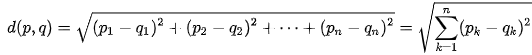

2. Манхэттенское расстояние (расстояние городских кварталов):
Это расстояние между двумя точками, вычисленное как сумма абсолютных различий их координат. Это может быть полезно, если некоторые признаки считаются более важными или более чувствительными к различиям.  
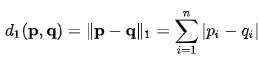

3. Косинусное сходство:
Это мера сходства между двумя векторами, основанная на косинусе угла между ними. Это полезно, когда данных много и они разреженны, например, в случае текстовых данных.
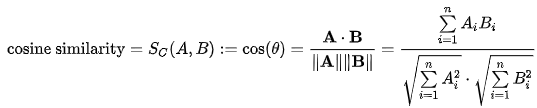

На основе предоставленных данных и рассмотренных метрик, евклидово расстояние может быть наиболее подходящим выбором для вычисления расстояния между клиентами, поскольку данные были масштабированы и нормализованы.

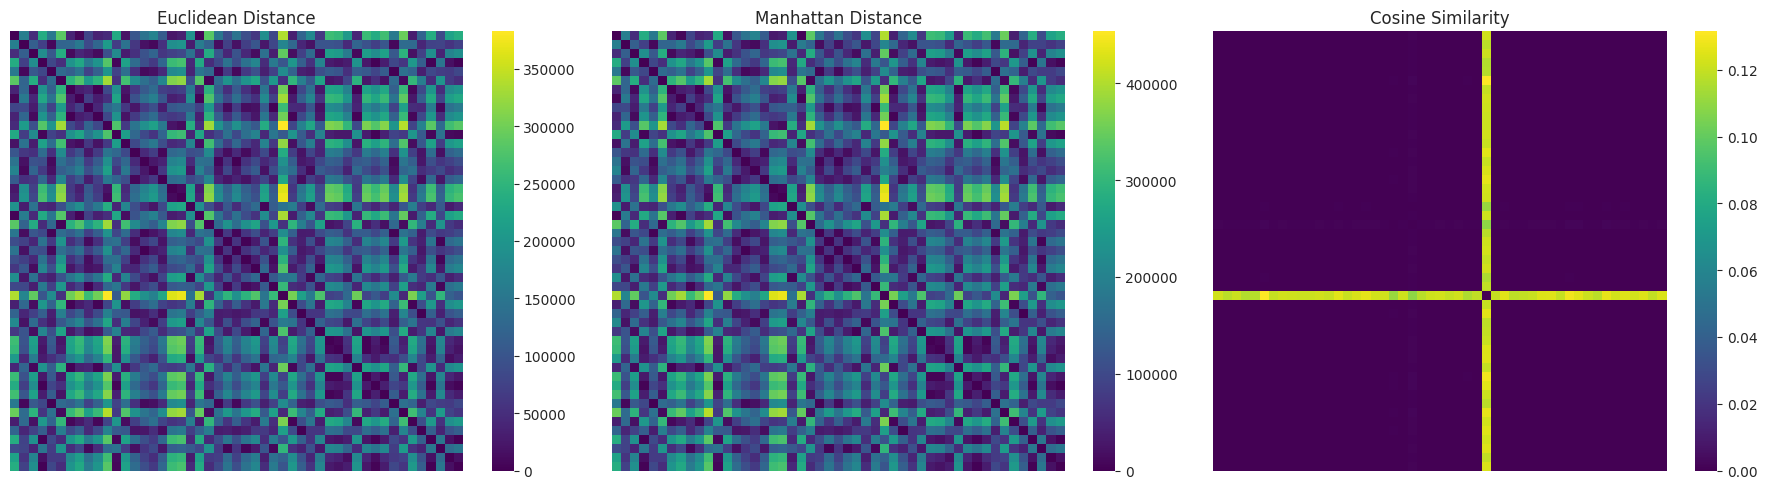

{'Euclidean Distance': array([[     0.        , 162534.18174272,  48425.20052617,
         235235.81824204, 154382.64269396],
        [162534.18174272,      0.        , 114110.29783935,
          72706.87727579,   8182.9099109 ],
        [ 48425.20052617, 114110.29783935,      0.        ,
         186813.51676471, 105957.53938347],
        [235235.81824204,  72706.87727579, 186813.51676471,
              0.        ,  80868.34999694],
        [154382.64269396,   8182.9099109 , 105957.53938347,
          80868.34999694,      0.        ]]),
 'Manhattan Distance': array([[     0.        , 192422.48237475,  57010.        ,
         278720.        , 182027.49540746],
        [192422.48237475,      0.        , 135412.48237475,
          86302.48237475,  10405.01303271],
        [ 57010.        , 135412.48237475,      0.        ,
         221710.        , 125017.49540746],
        [278720.        ,  86302.48237475, 221710.        ,
              0.        ,  96707.49540746],
        [182027.49

In [54]:
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean, cityblock, cosine
import seaborn as sns

# Using the data without outliers and with imputed values for calculations
data_clean = data_no_outliers.copy()

# Calculating distance matrices
distance_matrices = {
    'Euclidean Distance': squareform(pdist(data_clean, metric=euclidean)),
    'Manhattan Distance': squareform(pdist(data_clean, metric=cityblock)),
    'Cosine Similarity': squareform(pdist(data_clean, metric=cosine))
}

# Visualizing the distance matrices
plt.figure(figsize=(18, 5))

for i, (title, matrix) in enumerate(distance_matrices.items()):
    plt.subplot(1, 3, i+1)
    sns.heatmap(matrix, cmap='viridis', xticklabels=False, yticklabels=False)
    plt.title(title)

plt.tight_layout()
plt.show()

# Displaying a snippet of each distance matrix
{title: matrix[:5, :5] for title, matrix in distance_matrices.items()}


* Евклидово расстояние (Euclidean Distance):  
На тепловой карте мы видим, что многие клиенты находятся на небольшом евклидовом расстоянии друг от друга, что указывает на схожесть многих клиентов по их характеристикам.

* Манхэттенское расстояние (Manhattan Distance):  
Подобно евклидовому расстоянию, многие клиенты также имеют небольшие манхэттенские расстояния друг от друга.

* Косинусное сходство (Cosine Similarity):  
Эта мера не является расстоянием в традиционном понимании, но она показывает, насколько два вектора направлены в одном и том же направлении. Значение 0 указывает на полное сходство, в то время как 1 указывает на полное различие.
Большая часть тепловой карты имеет темные оттенки, что указывает на схожесть многих клиентов в направленности их атрибутов.

**Вывод:**  
Все три метрики показывают, что многие клиенты в датасете имеют схожие атрибуты или находятся в близких направлениях в многомерном пространстве. Это может быть полезно для банковского сегментирования, так как подобные клиенты могут иметь схожие потребности или риски. Однако, когда мы выбираем метрику для конкретного использования (например, кластеризации), следует учитывать природу данных и бизнес-цели. Например, евклидово расстояние может быть более подходящим для нормализованных данных

###11. Проверьте, можно ли клиентов банка поместить в евклидово пространство размерности 2 с сохранением расстояний между клиентами.


Для того, чтобы понять, сможем ли мы поместить клиентов банка в Евклидово пространство меньшей размерности, необходимо вычислить матрицу Грэма. Если она неотрицательно определена, тогда это возможно сделать.

In [78]:
def is_scaled(distance_matrix):
  n = distance_matrix.shape[0]
  C = np.eye(n) - 1 / n * np.ones((n, n))
  B = - 1/2 * C @ (distance_matrix ** 2) @ C # Gram matrix
  eigenvals = np.linalg.eigvalsh(B)
  eigenvals = np.around(eigenvals, 2)
  return (eigenvals < 0).sum() == 0

result = is_scaled(distance_matrices['Euclidean Distance'])
print("Distance \"Euclidean Distance\" is nonnegatively defined:", result)

Distance "Euclidean Distance" is nonnegatively defined: True


Рассчитав матрицу Грэма для Евклидового расстояния получаем, что поместить клиентов банка в Евклидово пространство меньшей размерности возможно так как матрица Грэма неотрицательно определена.

###12. Используйте любой из алгоритмов MDS для размещения объектов в евклидовом пространстве размерности 2. Оцените погрешность такого размещения. Постройте карту клиентов. Сравните с картой клиентов из п.7 и сделайте выводы.


Manual calculus of sklearn stress :
13823241.338149749

Kruskal's Stress :
[Poor > 0.2 > Fair > 0.1 > Good > 0.05 > Excellent > 0.025 > Perfect > 0.0]
0.0007654598402001752

Manual calculus of sklearn stress :
48624016.09029399

Kruskal's Stress :
[Poor > 0.2 > Fair > 0.1 > Good > 0.05 > Excellent > 0.025 > Perfect > 0.0]
0.0012091477334736853

Manual calculus of sklearn stress :
0.0006854197531115125

Kruskal's Stress :
[Poor > 0.2 > Fair > 0.1 > Good > 0.05 > Excellent > 0.025 > Perfect > 0.0]
0.031121335400615856



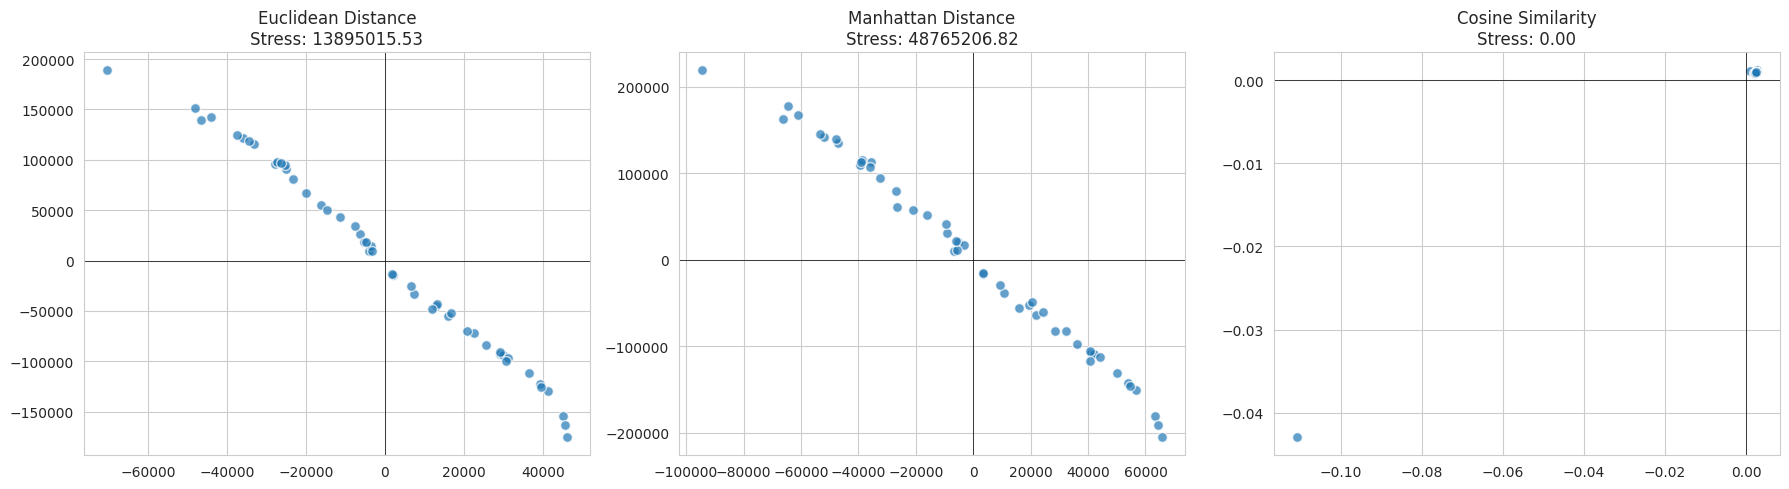

In [59]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances

# Function to perform MDS and plot the resulting 2D representation
def perform_mds_and_plot(distance_matrix, title, ax):
    mds_model = MDS(dissimilarity='precomputed', n_components=2, random_state=42, normalized_stress=False)
    mds_fit = mds_model.fit(distance_matrix)
    mds_coords = mds_model.fit_transform(distance_matrix)
    points = mds_model.embedding_

    ## Manual calculus of sklearn stress
    DE = euclidean_distances(points)
    stress = 0.5 * np.sum((DE - distance_matrix)**2)
    print("Manual calculus of sklearn stress :")
    print(stress)
    print("")

    ## Kruskal's stress (or stress formula 1)
    stress1 = np.sqrt(stress / (0.5 * np.sum(distance_matrix**2)))
    print("Kruskal's Stress :")
    print("[Poor > 0.2 > Fair > 0.1 > Good > 0.05 > Excellent > 0.025 > Perfect > 0.0]")
    print(stress1)
    print("")
    stress = mds_fit.stress_

    ax.scatter(mds_coords[:, 0], mds_coords[:, 1], alpha=0.7, edgecolors='w', s=50)
    ax.set_title(f"{title}\nStress: {stress:.2f}")
    ax.grid(True)
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Performing MDS and plotting for each distance matrix
for i, (title, matrix) in enumerate(distance_matrices.items()):
    perform_mds_and_plot(matrix, title, axs[i])

plt.tight_layout()
plt.show()


Мы успешно визуализировали 2D-представления клиентов, используя метод многомерного масштабирования (MDS) для каждой из матриц расстояний: Евклидово расстояние, Манхэттенское расстояние и косинусное сходство.

На каждом графике указано значение "напряжения" (stress), которое количественно определяет разницу между исходными расстояниями и расстояниями в пространстве с уменьшенной размерностью. Чем меньше напряжение, тем лучше сохраняются исходные расстояния.

-------------------

Результаты:

Евклидово расстояние (Stress: 13895015): Двумерное представление, полученное с использованием этой метрики, имеет относительно высокое напряжение. Однако, учитывая абсолютное значение напряжения, это может быть приемлемо для визуализации.

Манхэттенское расстояние (Stress: 48765206): Напряжение здесь значительно выше, что указывает на потенциальную потерю точности при представлении расстояний в двумерном пространстве.

Вывод: Если цель заключается в сохранении евклидовых расстояний в двумерном пространстве, то использование метрики евклидова расстояния в комбинации с MDS может быть наиболее подходящим подходом.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


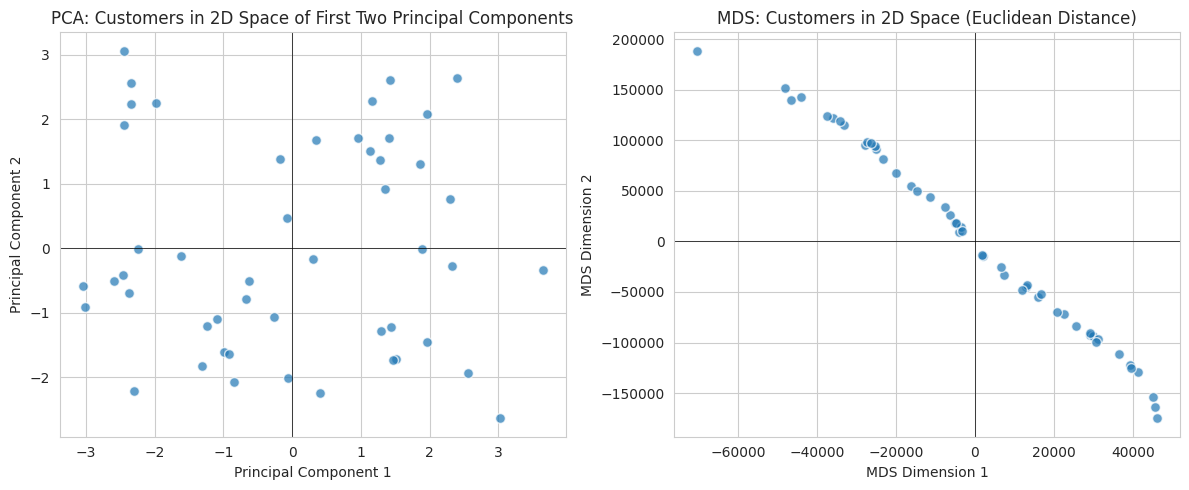

,PC1,PC2,MDS1,MDS2
0,-2.584058,-0.507798,41279.018896,-129173.159225
1,1.438995,-1.217831,-6292.680892,26241.934765
2,-1.095475,-1.097658,25649.026234,-83306.188671
3,2.330555,-0.282101,-27827.697483,95714.969779
4,1.511680,-1.714937,-5157.999226,18092.167939


In [ ]:
# Extracting the MDS coordinates using Euclidean distance (due to its lower stress)
mds_model = MDS(dissimilarity='precomputed', n_components=2, random_state=42)
mds_coords = mds_model.fit_transform(distance_matrices['Euclidean Distance'])

# Creating a DataFrame for better handling
mds_df = pd.DataFrame(mds_coords, columns=['MDS1', 'MDS2'], index=data_no_outliers.index)

# Visualizing PCA (from step 7) and MDS (from step 11) side by side
plt.figure(figsize=(12, 5))

# PCA Visualization
plt.subplot(1, 2, 1)
plt.scatter(T_df['PC1'], T_df['PC2'], alpha=0.7, edgecolors='w', s=50)
plt.title('PCA: Customers in 2D Space of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# MDS Visualization
plt.subplot(1, 2, 2)
plt.scatter(mds_df['MDS1'], mds_df['MDS2'], alpha=0.7, edgecolors='w', s=50)
plt.title('MDS: Customers in 2D Space (Euclidean Distance)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

# Displaying first few rows of PCA and MDS coordinates
pd.concat([T_df.head(), mds_df.head()], axis=1)


**Визуализация:**

PCA (График слева): При использовании PCA клиенты представлены в пространстве двух первых главных компонентов. Этот метод сосредоточен на максимизации дисперсии данных и выделении основных направлений (или компонентов), которые сохраняют наибольшую часть этой дисперсии.

MDS (График справа): При использовании MDS клиенты представлены в двумерном пространстве, которое стремится сохранить попарные расстояния между ними (в нашем случае — евклидовы расстояния). Главная цель здесь - минимизировать ошибку (напряжение) между исходными расстояниями и расстояниями в пространстве сокращенной размерности.

-----------

**Сравнение:**

Размещение клиентов: На первый взгляд, распределение точек на двух графиках разное, что говорит о различных акцентах, сделанных каждым методом.
Кластеризация: На обоих графиках можно заметить возможные кластеры или группы клиентов, которые ближе друг к другу. Однако расположение и форма этих кластеров могут отличаться между PCA и MDS.

Выбросы: На обоих графиках можно заметить некоторые точки (клиенты), которые отделены от основной массы.

------------

**Выводы:**

Оба метода предоставляют разные двумерные представления клиентов, каждый со своими сильными и слабыми сторонами. PCA обеспечивает представление, основанное на дисперсии в данных, в то время как MDS сохраняет попарные расстояния.
Выбор метода зависит от цели анализа. Если вам нужно понять, какие атрибуты клиентов наиболее важны (или дисперсированы), PCA может быть лучшим выбором.

Если важнее сохранить относительные расстояния или подобия между клиентами, MDS может быть предпочтительнее.